# Task 3
## Bogdan Romanov
### Data Analysis

The main metrics behind user acquisition are the volumes and the quality of the audience. The volumes tell us whether the investment of effort in the acquisition channel is reasonable and the quality of the audience further proves that these investments are sustainable and financially reasonable.

Take a look at the Facebook Ads dataset and propose a way to assess our acquisition efforts. We expect a campaign-level approach and suggestions on which data could be added to data sets for better assessment. In addition, identify top opportunities for improving the current efforts based on your approach.

<br>

## Preparations

In [1]:
# Basic packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
import os

# Miscellaneous
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Setting up the format of the graphs
sns.set(rc={'figure.figsize':(25,9)})

### 1. Upload the dataset to the IDE

In [2]:
df = pd.read_csv('MarTech Manager - Ads & Acquisition HW - dataset - dataset.csv')
print(df.shape)
df.head()

(338, 12)


,Reporting starts,Reporting ends,Campaign name,Attribution setting,Reach,Impressions,Amount spent (EUR),App installs,Mobile app registrations completed,Purchases,Unique purchases,Revenue per purchase (EUR)
0,2019-11-01,2019-11-01,"Country A, City AP, A/B test for voiceover - A...",7-day click or 1-day view,23559,28087,288.70,38.0,35.0,2.0,2.0,144.350000
1,2019-11-01,2019-11-01,"Country A, City AP, Conversion - App Engagemen...",7-day click or 1-day view,18972,33622,191.16,18.0,66.0,111.0,91.0,1.722162
2,2019-11-01,2019-11-01,"Country A, City AP - App installs (Bolt) - Pur...",7-day click or 1-day view,455293,577923,3018.43,1027.0,882.0,359.0,302.0,8.407883
3,2019-11-01,2019-11-01,"Country M, City MX (Grouped Cities) - App inst...",7-day click,12084,24608,64.61,6.0,2.0,1.0,1.0,64.610000
4,2019-11-01,2019-11-01,"Country M, City MX - App installs (Bolt)",7-day click,123743,169786,431.05,168.0,153.0,19.0,15.0,22.686842


In [3]:
df['Campaign name'].unique()

array(['Country A, City AP, A/B test for voiceover - App instals (Bolt)',
       'Country A, City AP, Conversion - App Engagement (Bolt)',
       'Country A, City AP - App installs (Bolt) - Purchase optimisation',
       'Country M, City MX (Grouped Cities) - App installs (Bolt)',
       'Country M, City MX - App installs (Bolt)',
       'Country A, City AP - App installs (Bolt) A/B test CTA on image vs without',
       'Country A, City AP - App installs (Bolt) / Installs Optimization',
       'Country A, City AP - App installs (Bolt) A/B test, animation vs static',
       'Country M, City MX - App installs (Bolt) A/B test, animation vs static',
       'Country A, City AP, Android - App installs (Bolt)'], dtype=object)

In [4]:
print(df['Reporting starts'].min(), df['Reporting ends'].max())

2019-11-01 2020-01-31


The dataset consists of 338 observations and 12 variables, excluding the index. Essentially, the dataframe contains 10 relatively unique marketing campaigns, which were deployed either in country A or M within the timeframe of '2019-11-01' to '2020-01-31', along with their corresponding metrics.

One stylistic issue I'd like to address is the titles; they are inconvenient to use due to spaces and occasional camel casing. I'll fix them before proceeding further.

In [5]:
def clean_var_name(var_name):
    """
    Convert a string to lowercase and replace spaces with underscores.
    Additionally, remove all punctuation from the string.

    :param var_name: The input string.
    :return: A cleaned version of the input string.
    """

    translator = str.maketrans(" ", "_", string.punctuation)
    cleaned_var_name = var_name.translate(translator)
    return cleaned_var_name.lower()

In [6]:
new_columns = []

for col_name in df.columns:
    new_col_name = clean_var_name(col_name)
    new_columns.append(new_col_name)

df.columns = new_columns
df.head()

,reporting_starts,reporting_ends,campaign_name,attribution_setting,reach,impressions,amount_spent_eur,app_installs,mobile_app_registrations_completed,purchases,unique_purchases,revenue_per_purchase_eur
0,2019-11-01,2019-11-01,"Country A, City AP, A/B test for voiceover - A...",7-day click or 1-day view,23559,28087,288.70,38.0,35.0,2.0,2.0,144.350000
1,2019-11-01,2019-11-01,"Country A, City AP, Conversion - App Engagemen...",7-day click or 1-day view,18972,33622,191.16,18.0,66.0,111.0,91.0,1.722162
2,2019-11-01,2019-11-01,"Country A, City AP - App installs (Bolt) - Pur...",7-day click or 1-day view,455293,577923,3018.43,1027.0,882.0,359.0,302.0,8.407883
3,2019-11-01,2019-11-01,"Country M, City MX (Grouped Cities) - App inst...",7-day click,12084,24608,64.61,6.0,2.0,1.0,1.0,64.610000
4,2019-11-01,2019-11-01,"Country M, City MX - App installs (Bolt)",7-day click,123743,169786,431.05,168.0,153.0,19.0,15.0,22.686842


### 2. Assess the number of missing values

In [7]:
df.isna().sum()[df.isna().sum()!=0]

app_installs                           9
mobile_app_registrations_completed    11
purchases                             74
unique_purchases                      74
revenue_per_purchase_eur              74
dtype: int64

Three indicators, namely `purchases`, `unique_purchases`, and `revenue_per_purchase_eur`, are missing more than 20% of the observations. This could pose a problem if the dataset were smaller or if these were the only essential variables. The `app_installs` and `mobile_app_registrations_completed` indicators have 9 and 11 missing values, respectively. I'll double-check to ensure this isn't a case of data missing not at random.

In [8]:
missing_values = df[df.purchases.isna() == True]
missing_values.groupby('campaign_name').count()

,reporting_starts,reporting_ends,attribution_setting,reach,impressions,amount_spent_eur,app_installs,mobile_app_registrations_completed,purchases,unique_purchases,revenue_per_purchase_eur
campaign_name,,,,,,,,,,,
"Country A, City AP - App installs (Bolt) A/B test CTA on image vs without",1,1,1,1,1,1,1,1,0,0,0
"Country A, City AP, Android - App installs (Bolt)",1,1,1,1,1,1,1,1,0,0,0
"Country M, City MX (Grouped Cities) - App installs (Bolt)",65,65,65,65,65,65,63,61,0,0,0
"Country M, City MX - App installs (Bolt) A/B test, animation vs static",7,7,7,7,7,7,0,0,0,0,0


In [9]:
df[df.campaign_name == 'Country M, City MX (Grouped Cities) - App installs (Bolt)']

,reporting_starts,reporting_ends,campaign_name,attribution_setting,reach,impressions,amount_spent_eur,app_installs,mobile_app_registrations_completed,purchases,unique_purchases,revenue_per_purchase_eur
3,2019-11-01,2019-11-01,"Country M, City MX (Grouped Cities) - App inst...",7-day click,12084,24608,64.61,6.0,2.0,1.0,1.0,64.61
8,2019-11-02,2019-11-02,"Country M, City MX (Grouped Cities) - App inst...",7-day click,12768,27573,66.40,11.0,8.0,NaN,NaN,NaN
13,2019-11-03,2019-11-03,"Country M, City MX (Grouped Cities) - App inst...",7-day click,12440,25602,55.64,4.0,1.0,2.0,1.0,27.82
17,2019-11-04,2019-11-04,"Country M, City MX (Grouped Cities) - App inst...",7-day click,4756,8299,15.85,4.0,3.0,NaN,NaN,NaN
20,2019-11-05,2019-11-05,"Country M, City MX (Grouped Cities) - App inst...",7-day click,5150,8364,15.69,5.0,5.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
324,2020-01-27,2020-01-27,"Country M, City MX (Grouped Cities) - App inst...",7-day click,5518,9073,15.56,7.0,2.0,NaN,NaN,NaN
327,2020-01-28,2020-01-28,"Country M, City MX (Grouped Cities) - App inst...",7-day click,5344,8770,16.12,9.0,4.0,1.0,1.0,16.12
330,2020-01-29,2020-01-29,"Country M, City MX (Grouped Cities) - App inst...",7-day click,5184,8959,15.41,7.0,2.0,NaN,NaN,NaN
333,2020-01-30,2020-01-30,"Country M, City MX (Grouped Cities) - App inst...",7-day click,5232,8971,15.68,9.0,4.0,1.0,1.0,15.68


Firstly, it's commonly understood that if there's no value for `purchases`, then its derivatives like `unique_purchases` and `revenue_per_purchase_eur` would also be absent. However, it appears that a significant portion of the `purchases` values for the 'Country M, City MX (Grouped Cities) - App installs (Bolt)' advertising campaign are missing. Specifically, out of 92 entries, 65 lack information on purchases. This indicates potential areas for improvement in data collection and storage.

### 3. Data pre-processing

In [10]:
df.dtypes

reporting_starts                       object
reporting_ends                         object
campaign_name                          object
attribution_setting                    object
reach                                   int64
impressions                             int64
amount_spent_eur                      float64
app_installs                          float64
mobile_app_registrations_completed    float64
purchases                             float64
unique_purchases                      float64
revenue_per_purchase_eur              float64
dtype: object

All variables are in the appropriate formats, except for `reporting_starts` and `reporting_ends`. These are strings, but could be converted to datetime objects.

In [11]:
df.reporting_starts = pd.to_datetime(df.reporting_starts)
df.reporting_ends = pd.to_datetime(df.reporting_ends)

The final step involves deciding how to handle the missing values. My initial inclination is to simply filter out these missing values. However, as previously mentioned, one campaign accounts for a significant portion of rows with missing data. Filtering out NAs would eliminate 20% of the entire dataset and 80% of the data related to that specific campaign.

### 4. Feature engineering

For convenience, I extracted the country name from the campaign. Similarly, I derived a `year_month` column, which is simply the date simplified. Lastly, I calculated the `total_revenue` by multiplying the revenue per purchase with the number of purchases.

In [12]:
df['country'] = df['campaign_name'].str.extract(r'(Country [A-Z])')
df['year_month'] = df['reporting_starts'].dt.strftime('%Y-%m')
df['total_revenue'] = df['revenue_per_purchase_eur'] * df['purchases']

In [13]:
df.pivot_table(index='reporting_starts',
               values=['amount_spent_eur', 'total_revenue'],
               columns='country'
               )

amount_spent_eur           total_revenue            
country                 Country A Country M     Country A   Country M
reporting_starts                                                     
2019-11-01            1166.096667   247.830   1166.096660  247.829999
2019-11-02            1241.260000   255.145   1241.259991  443.889989
2019-11-03            1121.253333   273.935   1121.253381  273.934999
2019-11-04            1464.300000   360.610   1464.299964  705.369987
2019-11-05            2946.240000   369.640   2946.239970  723.589996
...                           ...       ...           ...         ...
2020-01-27            3434.030000    37.885   3434.029809   60.210000
2020-01-28            1982.490000     9.385   1982.490015    9.385000
2020-01-29            1817.010000    10.095   1817.009982    4.780000
2020-01-30            1942.780000    10.420   1942.780173   10.419997
2020-01-31            1727.660000    10.930   1727.659990   10.930000

[92 rows x 4 columns]

<br>

## Analysis

### 1. Tale of Two Countries: Country-level analysis

In [14]:
pivot_table = df.pivot_table(index='country',
                             values='total_revenue',
                             columns='year_month',
                             aggfunc='sum',
                             margins=True
                             )
pivot_table

year_month,2019-11,2019-12,2020-01,All
country,,,,
Country A,113545.939692,272513.362790,123900.390510,509959.692992
Country M,15472.709976,22534.610011,6149.049991,44156.369978
All,129018.649668,295047.972801,130049.440501,554116.062970


In [15]:
bar_palette=['#69CE8C', '#ce69ce', '#499072']

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Amount spent/Total revenue'),
 Text(0.5, 1.0, 'Country M')]

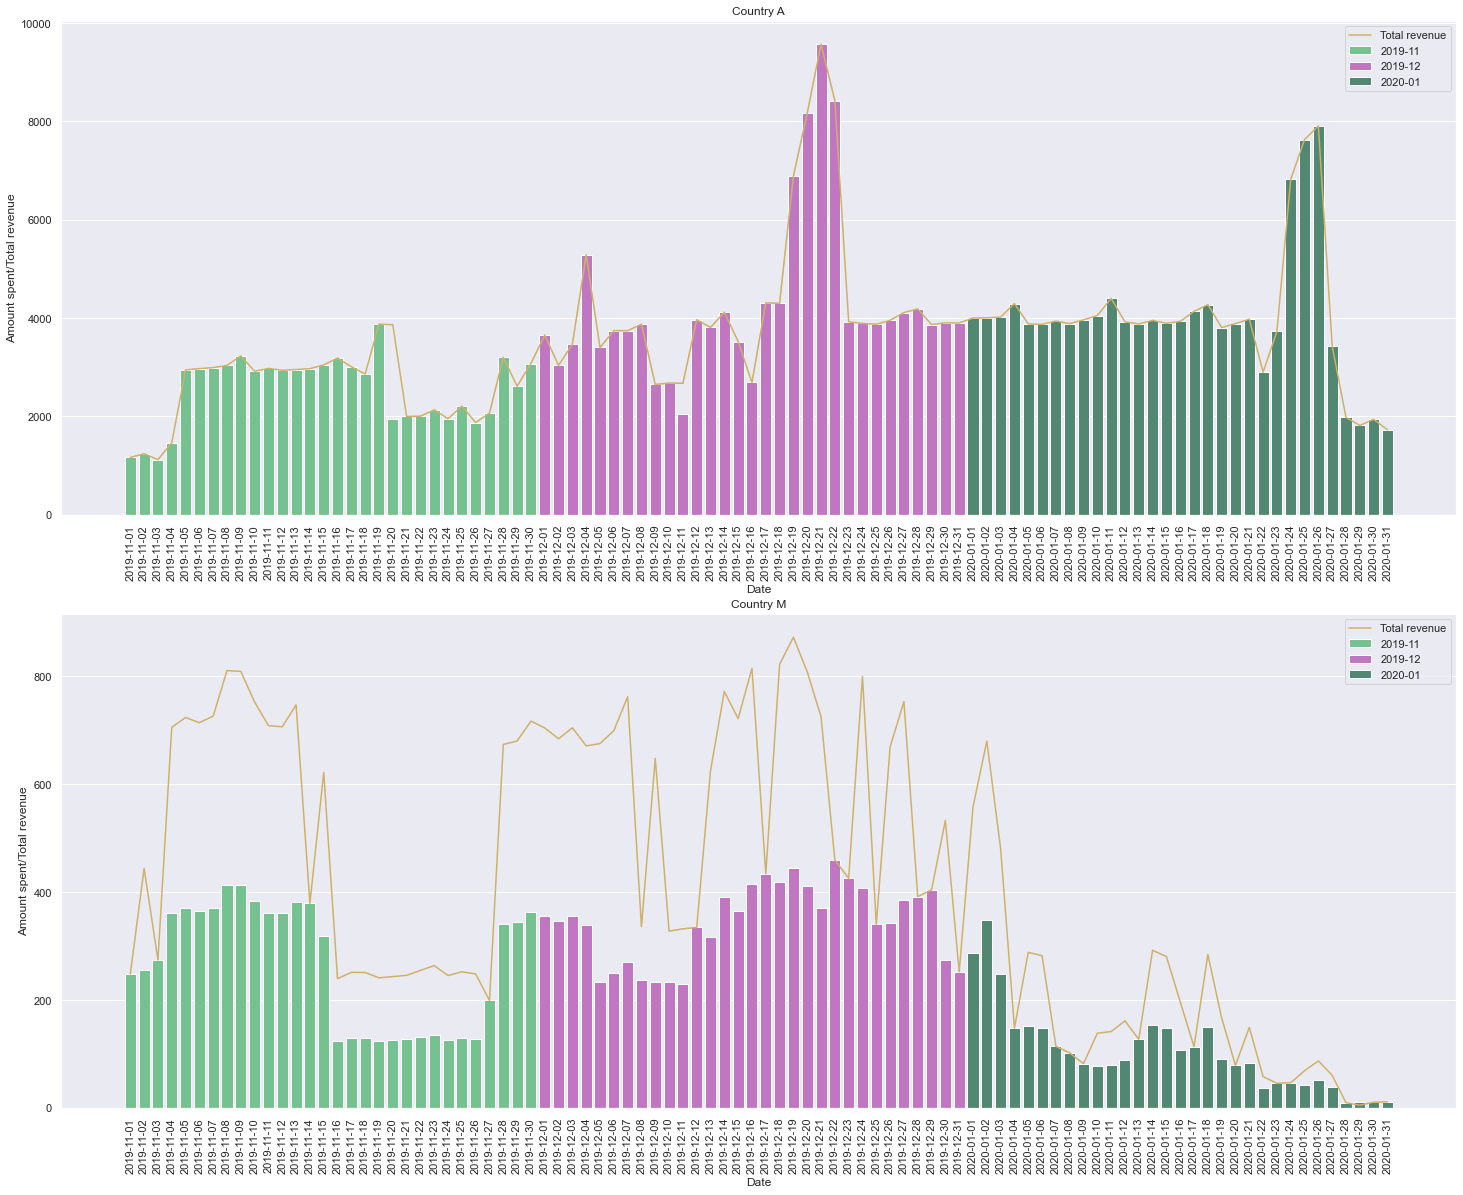

In [16]:
fig, axs = plt.subplots(nrows=2, figsize=(25, 20))

sns.barplot(data=df[df.country=='Country A'],
            x=df.reporting_starts.dt.strftime('%Y-%m-%d'),
            y='amount_spent_eur',
            ci=False,
            hue='year_month',
            palette=bar_palette,
            dodge=False,
            ax=axs[0]
            )

sns.lineplot(data=df[df.country=='Country A'],
             x=df.reporting_starts.dt.strftime('%Y-%m-%d'),
             y='total_revenue',
             ci=False,
             color='#ceb069',
             ax=axs[0],
             label='Total revenue'
             )

axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
axs[0].set(xlabel='Date',
           ylabel='Amount spent/Total revenue',
           title='Country A'
           )


sns.barplot(data=df[df.country=='Country M'],
            x=df.reporting_starts.dt.strftime('%Y-%m-%d'),
            y='amount_spent_eur',
            ci=False,
            hue='year_month',
            palette=bar_palette,
            dodge=False,
            ax=axs[1]
            )

sns.lineplot(data=df[df.country=='Country M'],
             x=df.reporting_starts.dt.strftime('%Y-%m-%d'),
             y='total_revenue',
             ci=False,
             color='#ceb069',
             ax=axs[1],
             label='Total revenue'
             )

axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
axs[1].set(xlabel='Date',
           ylabel='Amount spent/Total revenue',
           title='Country M'
           )


<br>

In [17]:
def format_number(number):
    """
    Beautify the number formatting by limiting the decimals to two places and
    adding a comma as a thousand separator.

    :param number: Input float or integer number to be formatted.
    :return: Formatted string with limited decimals and comma separator.
    """
    return f'{number:,.2f}'

In [18]:
def pivot_table_with_percentage(index_variable:str, value_variable:str):
    """
    Generate a pivot table with percentage difference columns for consecutive months.

    This function creates a pivot table with the specified index and value variables,
    grouped by the 'year_month' column. Additionally, it calculates percentage differences
    for November-December and December-January, then formats the initial month columns using
    the `format_number` function.

    :param index_variable: The column in the DataFrame 'df' to be used as the index of the pivot table.
    :param value_variable: The column in the DataFrame 'df' to aggregate and summarize in the pivot table.
    :return: A pivot table with the initial month columns formatted and additional columns for percentage differences.

    """
    pivot_table = df.pivot_table(index=index_variable,
                                 values=value_variable,
                                 columns='year_month',
                                 aggfunc='sum',
                                 fill_value=0
                                 )

    pivot_table['perc_diff_nov_dec'] = round(((pivot_table['2019-12'] - pivot_table['2019-11']) / pivot_table['2019-11']) * 100, 1)
    pivot_table['perc_diff_dec_jan'] = round(((pivot_table['2020-01'] - pivot_table['2019-12']) / pivot_table['2019-12']) * 100, 1)
    pivot_table.iloc[:, :3] = pivot_table.iloc[:, :3].applymap(format_number)

    return pivot_table

In [19]:
install_pivot = pivot_table_with_percentage('country', 'app_installs')
install_pivot

year_month,2019-11,2019-12,2020-01,perc_diff_nov_dec,perc_diff_dec_jan
country,,,,,
Country A,"28,021.00","80,534.00","28,763.00",187.4,-64.3
Country M,"4,612.00","5,209.00","1,852.00",12.9,-64.4


In [20]:
purchase_pivot = pivot_table_with_percentage('country', 'purchases')
purchase_pivot

year_month,2019-11,2019-12,2020-01,perc_diff_nov_dec,perc_diff_dec_jan
country,,,,,
Country A,"17,234.00","51,010.00","28,618.00",196.0,-43.9
Country M,737.00,660.00,311.00,-10.4,-52.9


In [21]:
registration_pivot = pivot_table_with_percentage('country', 'mobile_app_registrations_completed')
registration_pivot

year_month,2019-11,2019-12,2020-01,perc_diff_nov_dec,perc_diff_dec_jan
country,,,,,
Country A,"24,125.00","70,077.00","26,362.00",190.5,-62.4
Country M,"4,005.00","3,970.00",998.00,-0.9,-74.9


<br>

## Correlation interruption

<AxesSubplot:>

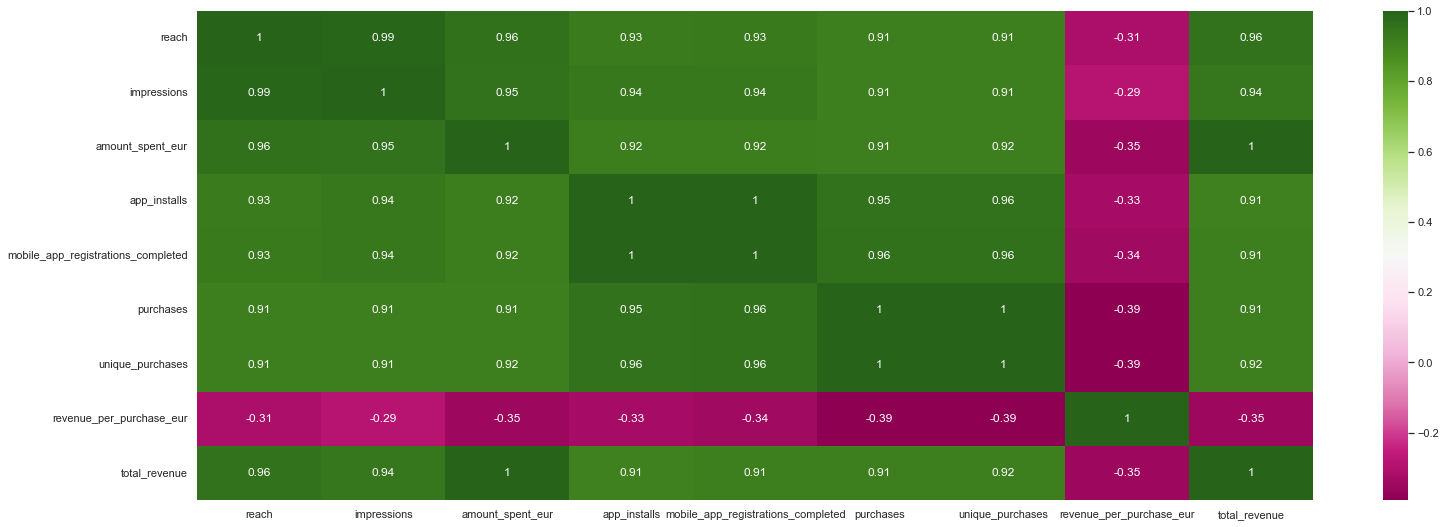

In [22]:
sns.heatmap(df.corr(),
            annot=True,
            cmap='PiYG'
            )

<br>

## 2.	Where is revenue? Campaign-level analysis

In [23]:
reach_campaign_pivot = pivot_table_with_percentage('campaign_name', 'reach')
reach_campaign_pivot

year_month,2019-11,2019-12,2020-01,perc_diff_nov_dec,perc_diff_dec_jan
campaign_name,,,,,
"Country A, City AP - App installs (Bolt) - Purchase optimisation","11,581,885.00","10,897,960.00","17,190,620.00",-5.9,57.7
"Country A, City AP - App installs (Bolt) / Installs Optimization","2,136,578.00","24,039,107.00",0.00,1025.1,-100.0
"Country A, City AP - App installs (Bolt) A/B test CTA on image vs without","74,088.00",0.00,0.00,-100.0,NaN
"Country A, City AP - App installs (Bolt) A/B test, animation vs static",0.00,"93,882.00",0.00,inf,-100.0
"Country A, City AP, A/B test for voiceover - App instals (Bolt)","74,407.00",0.00,0.00,-100.0,NaN
"Country A, City AP, Android - App installs (Bolt)",0.00,"448,754.00",0.00,inf,-100.0
"Country A, City AP, Conversion - App Engagement (Bolt)","63,345.00",0.00,0.00,-100.0,NaN
"Country M, City MX (Grouped Cities) - App installs (Bolt)","130,845.00","124,275.00","197,026.00",-5.0,58.5
"Country M, City MX - App installs (Bolt)","3,884,208.00","4,904,629.00","1,999,203.00",26.3,-59.2


In [24]:
impression_campaign_pivot = pivot_table_with_percentage('campaign_name', 'impressions')
impression_campaign_pivot

year_month,2019-11,2019-12,2020-01,perc_diff_nov_dec,perc_diff_dec_jan
campaign_name,,,,,
"Country A, City AP - App installs (Bolt) - Purchase optimisation","14,366,897.00","15,390,237.00","25,203,372.00",7.1,63.8
"Country A, City AP - App installs (Bolt) / Installs Optimization","2,912,588.00","40,212,348.00",0.00,1280.6,-100.0
"Country A, City AP - App installs (Bolt) A/B test CTA on image vs without","77,277.00",0.00,0.00,-100.0,NaN
"Country A, City AP - App installs (Bolt) A/B test, animation vs static",0.00,"97,260.00",0.00,inf,-100.0
"Country A, City AP, A/B test for voiceover - App instals (Bolt)","87,073.00",0.00,0.00,-100.0,NaN
"Country A, City AP, Android - App installs (Bolt)",0.00,"612,148.00",0.00,inf,-100.0
"Country A, City AP, Conversion - App Engagement (Bolt)","113,942.00",0.00,0.00,-100.0,NaN
"Country M, City MX (Grouped Cities) - App installs (Bolt)","221,180.00","194,285.00","345,045.00",-12.2,77.6
"Country M, City MX - App installs (Bolt)","5,481,554.00","7,327,850.00","2,887,738.00",33.7,-60.6


In [25]:
install_campaign_pivot = pivot_table_with_percentage('campaign_name', 'app_installs')
install_campaign_pivot

year_month,2019-11,2019-12,2020-01,perc_diff_nov_dec,perc_diff_dec_jan
campaign_name,,,,,
"Country A, City AP - App installs (Bolt) - Purchase optimisation","24,438.00","25,387.00","28,763.00",3.9,13.3
"Country A, City AP - App installs (Bolt) / Installs Optimization","3,192.00","53,878.00",0.00,1587.9,-100.0
"Country A, City AP - App installs (Bolt) A/B test CTA on image vs without",119.00,0.00,0.00,-100.0,NaN
"Country A, City AP - App installs (Bolt) A/B test, animation vs static",0.00,165.00,0.00,inf,-100.0
"Country A, City AP, A/B test for voiceover - App instals (Bolt)",179.00,0.00,0.00,-100.0,NaN
"Country A, City AP, Android - App installs (Bolt)",0.00,"1,104.00",0.00,inf,-100.0
"Country A, City AP, Conversion - App Engagement (Bolt)",93.00,0.00,0.00,-100.0,NaN
"Country M, City MX (Grouped Cities) - App installs (Bolt)",110.00,144.00,234.00,30.9,62.5
"Country M, City MX - App installs (Bolt)","4,502.00","5,065.00","1,618.00",12.5,-68.1


In [26]:
registration_campaign_pivot = pivot_table_with_percentage('campaign_name', 'mobile_app_registrations_completed')
registration_campaign_pivot

year_month,2019-11,2019-12,2020-01,perc_diff_nov_dec,perc_diff_dec_jan
campaign_name,,,,,
"Country A, City AP - App installs (Bolt) - Purchase optimisation","20,935.00","22,252.00","26,362.00",6.3,18.5
"Country A, City AP - App installs (Bolt) / Installs Optimization","2,646.00","46,679.00",0.00,1664.1,-100.0
"Country A, City AP - App installs (Bolt) A/B test CTA on image vs without",89.00,0.00,0.00,-100.0,NaN
"Country A, City AP - App installs (Bolt) A/B test, animation vs static",0.00,149.00,0.00,inf,-100.0
"Country A, City AP, A/B test for voiceover - App instals (Bolt)",152.00,0.00,0.00,-100.0,NaN
"Country A, City AP, Android - App installs (Bolt)",0.00,997.00,0.00,inf,-100.0
"Country A, City AP, Conversion - App Engagement (Bolt)",303.00,0.00,0.00,-100.0,NaN
"Country M, City MX (Grouped Cities) - App installs (Bolt)",76.00,97.00,112.00,27.6,15.5
"Country M, City MX - App installs (Bolt)","3,929.00","3,873.00",886.00,-1.4,-77.1


In [27]:
purchase_campaign_pivot = pivot_table_with_percentage('campaign_name', 'purchases')
purchase_campaign_pivot

year_month,2019-11,2019-12,2020-01,perc_diff_nov_dec,perc_diff_dec_jan
campaign_name,,,,,
"Country A, City AP - App installs (Bolt) - Purchase optimisation","14,162.00","17,283.00","28,618.00",22.0,65.6
"Country A, City AP - App installs (Bolt) / Installs Optimization","2,338.00","33,353.00",0.00,1326.6,-100.0
"Country A, City AP - App installs (Bolt) A/B test CTA on image vs without",76.00,0.00,0.00,-100.0,NaN
"Country A, City AP - App installs (Bolt) A/B test, animation vs static",0.00,160.00,0.00,inf,-100.0
"Country A, City AP, A/B test for voiceover - App instals (Bolt)",25.00,0.00,0.00,-100.0,NaN
"Country A, City AP, Android - App installs (Bolt)",0.00,214.00,0.00,inf,-100.0
"Country A, City AP, Conversion - App Engagement (Bolt)",633.00,0.00,0.00,-100.0,NaN
"Country M, City MX (Grouped Cities) - App installs (Bolt)",7.00,20.00,24.00,185.7,20.0
"Country M, City MX - App installs (Bolt)",730.00,640.00,287.00,-12.3,-55.2


In [28]:
spent_campaign_pivot = pivot_table_with_percentage('campaign_name', 'amount_spent_eur')
spent_campaign_pivot

year_month,2019-11,2019-12,2020-01,perc_diff_nov_dec,perc_diff_dec_jan
campaign_name,,,,,
"Country A, City AP - App installs (Bolt) - Purchase optimisation","100,796.41","102,740.67","123,900.39",1.9,20.6
"Country A, City AP - App installs (Bolt) / Installs Optimization","10,943.55","164,696.86",0.00,1405.0,-100.0
"Country A, City AP - App installs (Bolt) A/B test CTA on image vs without",349.98,0.00,0.00,-100.0,NaN
"Country A, City AP - App installs (Bolt) A/B test, animation vs static",0.00,"1,000.00",0.00,inf,-100.0
"Country A, City AP, A/B test for voiceover - App instals (Bolt)",866.85,0.00,0.00,-100.0,NaN
"Country A, City AP, Android - App installs (Bolt)",0.00,"4,288.22",0.00,inf,-100.0
"Country A, City AP, Conversion - App Engagement (Bolt)",611.36,0.00,0.00,-100.0,NaN
"Country M, City MX (Grouped Cities) - App installs (Bolt)",494.46,376.31,495.85,-23.9,31.8
"Country M, City MX - App installs (Bolt)","15,328.70","22,391.31","5,956.15",46.1,-73.4


In [29]:
with pd.ExcelWriter('pivot_tables.xlsx') as writer:
    install_pivot.to_excel(writer, sheet_name='install_pivot')
    purchase_pivot.to_excel(writer, sheet_name='purchase_pivot')
    registration_pivot.to_excel(writer, sheet_name='registration_pivot')
    reach_campaign_pivot.to_excel(writer, sheet_name='reach_campaign_pivot')
    impression_campaign_pivot.to_excel(writer, sheet_name='impression_campaign_pivot')
    install_campaign_pivot.to_excel(writer, sheet_name='install_campaign_pivot')
    registration_campaign_pivot.to_excel(writer, sheet_name='registration_campaign_pivot')
    purchase_campaign_pivot.to_excel(writer, sheet_name='purchase_campaign_pivot')
    spent_campaign_pivot.to_excel(writer, sheet_name='spent_campaign_pivot')

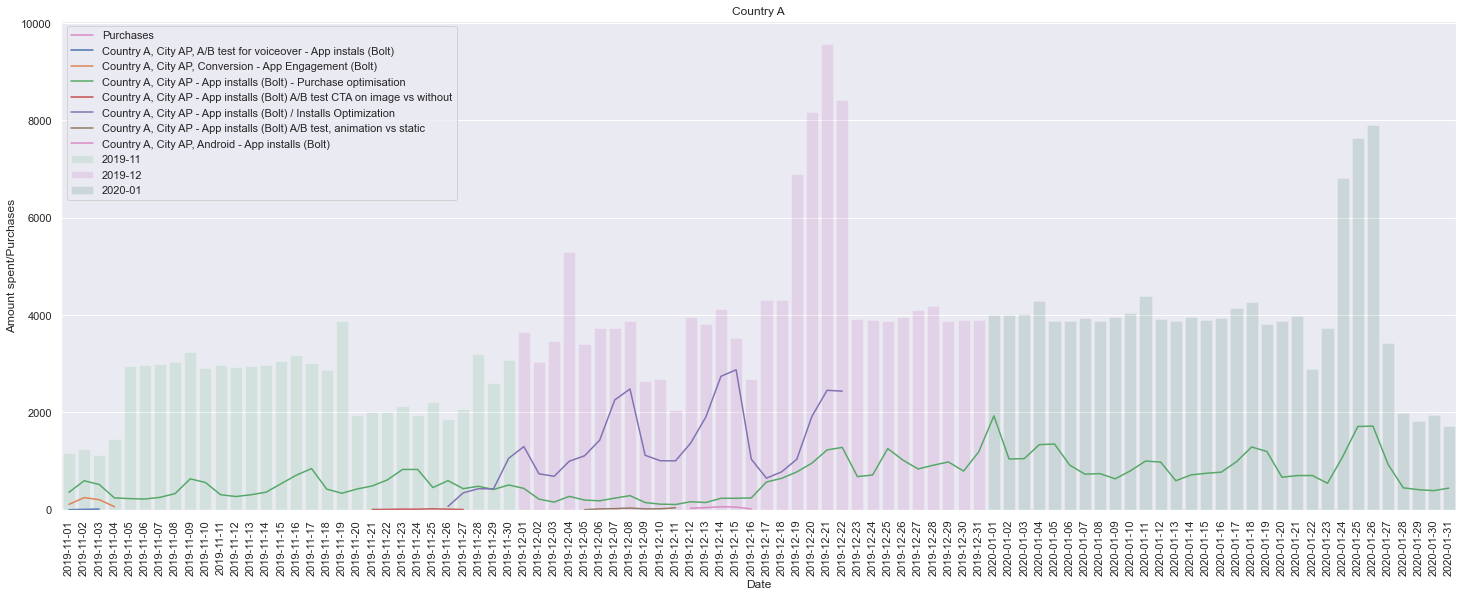

In [30]:
g = sns.lineplot(data=df[df.country == 'Country A'],
             x=df.reporting_starts.dt.strftime('%Y-%m-%d'),
             y='purchases',
             hue='campaign_name',
             label='Purchases'
             )

g = sns.barplot(data=df[df.country=='Country A'],
            x=df.reporting_starts.dt.strftime('%Y-%m-%d'),
            y='amount_spent_eur',
            ci=False,
            hue='year_month',
            palette=bar_palette,
            alpha=0.2,
            dodge=False,
            )

g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(xlabel='Date',
           ylabel='Amount spent/Purchases',
           title='Country A'
           )

handles, labels = g.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
g.legend(by_label.values(), by_label.keys(), loc='upper left')

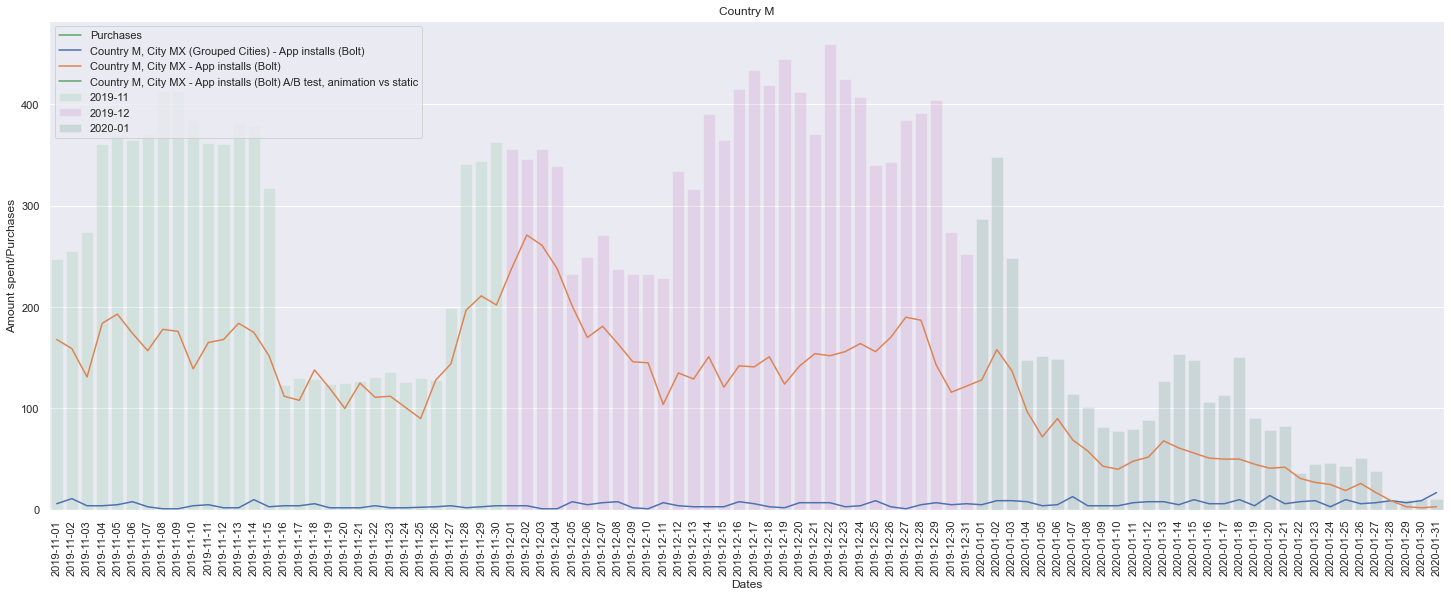

In [31]:
g = sns.lineplot(data=df[df.country == 'Country M'],
             x=df.reporting_starts.dt.strftime('%Y-%m-%d'),
             y='app_installs',
             hue='campaign_name',
             label='Purchases'
             )

g = sns.barplot(data=df[df.country=='Country M'],
            x=df.reporting_starts.dt.strftime('%Y-%m-%d'),
            y='amount_spent_eur',
            ci=False,
            hue='year_month',
            palette=bar_palette,
            alpha=0.2,
            dodge=False,
            )

g.set_xticklabels(axs[1].get_xticklabels(), rotation=90)
g.set(xlabel='Dates',
           ylabel='Amount spent/Purchases',
           title='Country M'
           )

handles, labels = g.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
g.legend(by_label.values(), by_label.keys(), loc='upper left')

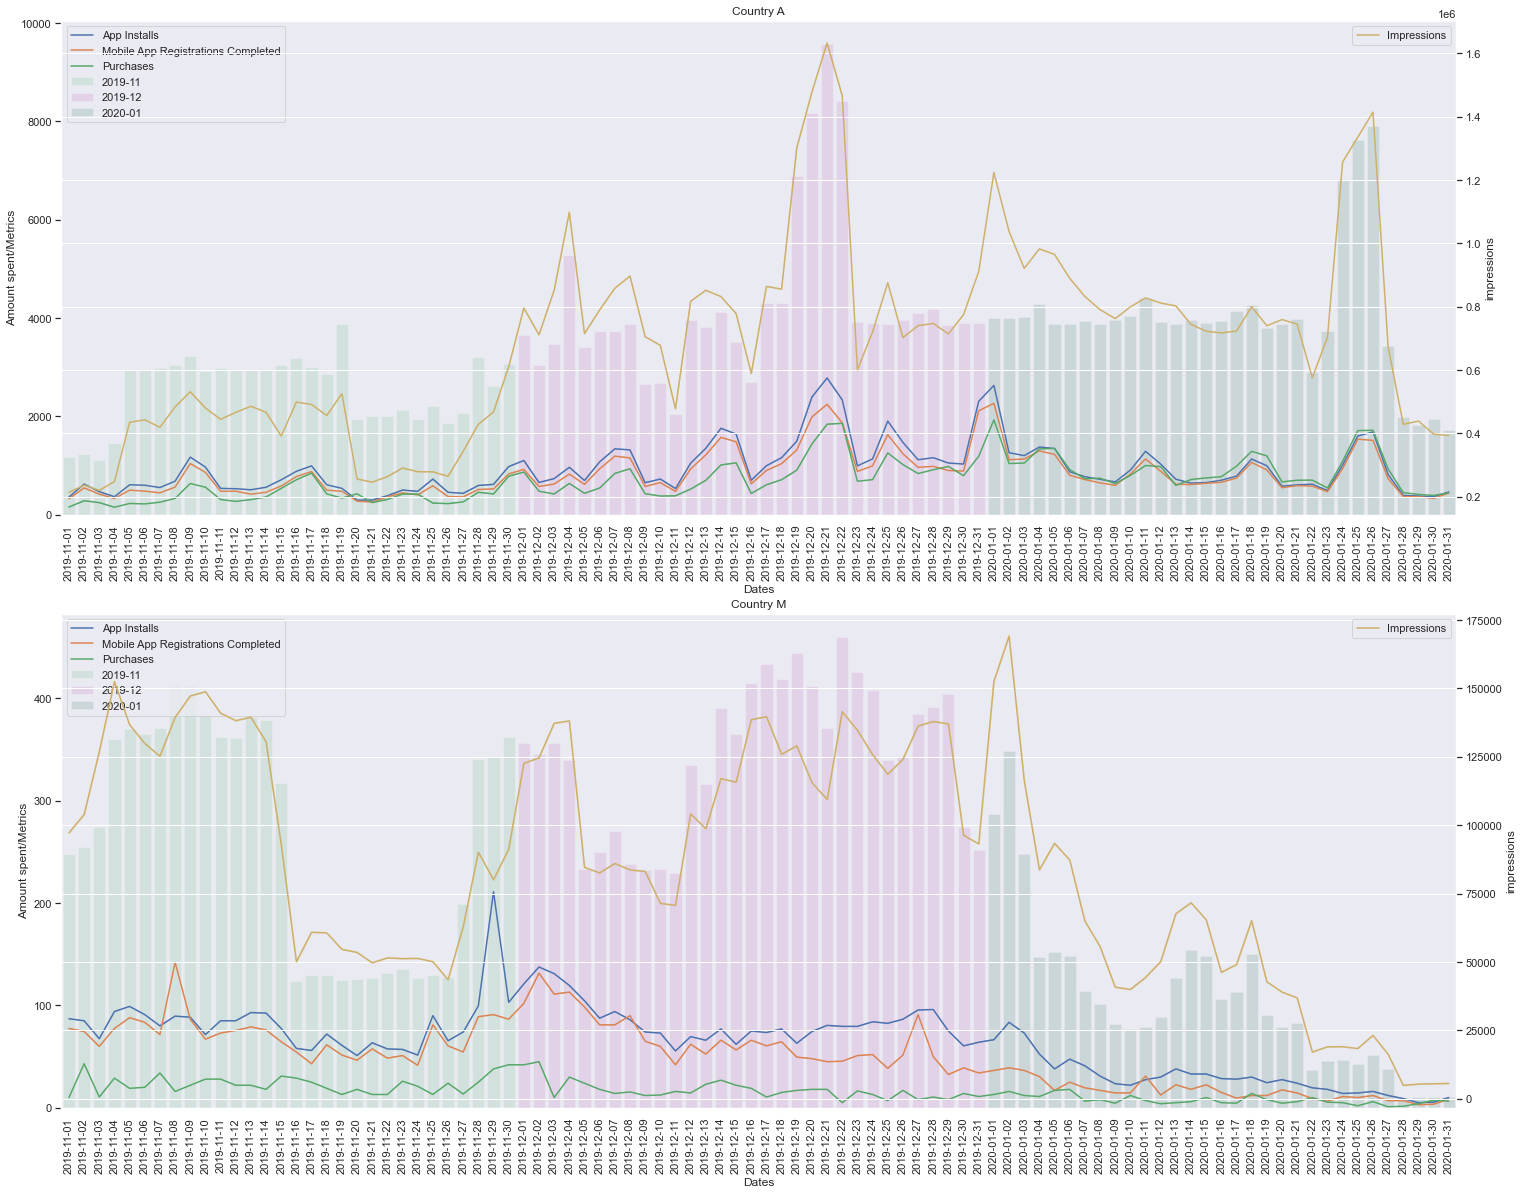

In [32]:
fig, axs = plt.subplots(nrows=2, figsize=(25, 20))

sns.lineplot(data=df[df.country=='Country A'],
             x=df.reporting_starts.dt.strftime('%Y-%m-%d'),
             y='app_installs',
             ci=False,
             ax=axs[0],
             label='App Installs'
             )

sns.lineplot(data=df[df.country=='Country A'],
             x=df.reporting_starts.dt.strftime('%Y-%m-%d'),
             y='mobile_app_registrations_completed',
             ci=False,
             ax=axs[0],
             label='Mobile App Registrations Completed'
             )

sns.lineplot(data=df[df.country=='Country A'],
             x=df.reporting_starts.dt.strftime('%Y-%m-%d'),
             y='purchases',
             ci=False,
             ax=axs[0],
             label='Purchases'
             )

ax1 = axs[0].twinx()

sns.lineplot(data=df[df.country=='Country A'],
             x=df.reporting_starts.dt.strftime('%Y-%m-%d'),
             y='impressions',
             color='#ceb069',
             ci=False,
             ax=ax1,
             label='Impressions'
             )

sns.barplot(data=df[df.country=='Country A'],
            x=df.reporting_starts.dt.strftime('%Y-%m-%d'),
            y='amount_spent_eur',
            ci=False,
            hue='year_month',
            palette=bar_palette,
            alpha=0.2,
            dodge=False,
            ax=axs[0]
            )

axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
axs[0].set(xlabel='Dates',
           ylabel='Amount spent/Metrics',
           title='Country A'
           )

axs[0].legend(loc='upper left')
axs[0].grid(False)


sns.lineplot(data=df[df.country=='Country M'],
             x=df.reporting_starts.dt.strftime('%Y-%m-%d'),
             y='app_installs',
             ci=False,
             ax=axs[1],
             label='App Installs'
             )

sns.lineplot(data=df[df.country=='Country M'],
             x=df.reporting_starts.dt.strftime('%Y-%m-%d'),
             y='mobile_app_registrations_completed',
             ci=False,
             ax=axs[1],
             label='Mobile App Registrations Completed'
             )

sns.lineplot(data=df[df.country=='Country M'],
             x=df.reporting_starts.dt.strftime('%Y-%m-%d'),
             y='purchases',
             ci=False,
             ax=axs[1],
             label='Purchases'
             )

ax2 = axs[1].twinx()

sns.lineplot(data=df[df.country=='Country M'],
             x=df.reporting_starts.dt.strftime('%Y-%m-%d'),
             y='impressions',
             color='#ceb069',
             ci=False,
             ax=ax2,
             label='Impressions'
             )

sns.barplot(data=df[df.country=='Country M'],
            x=df.reporting_starts.dt.strftime('%Y-%m-%d'),
            y='amount_spent_eur',
            ci=False,
            hue='year_month',
            palette=bar_palette,
            alpha=0.2,
            dodge=False,
            ax=axs[1]
            )

axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
axs[1].set(xlabel='Dates',
           ylabel='Amount spent/Metrics',
           title='Country M'
           )

axs[1].legend(loc='upper left')
axs[1].grid(False)